https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
    
https://www.kaggle.com/ironfrown/deep-learning-house-price-prediction-keras





https://dissertationgenius.com/12-steps-write-effective-discussion-chapter/

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
data = pd.read_csv("auto_table_01.csv", error_bad_lines=False, sep=";")
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ALUFELNI,AMERIKAI MODELL,ASR,AUTOMATA,BI-XENON,BLUETOOTH,BĹR,CD-RĂDIĂ“,CENTRĂLZĂR,DVD,...,HENGERURTARTALOM,TELJESITMENY KW,TELJESITMENY LOERO,MEGTETT,link,nev,ALLITHATO KORMANY,AR,MARKA,LOGAR
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1248,55,75,62280,https://www.hasznaltauto.hu/szemelyauto/hyunda...,HYUNDAI I20 1.25i LP Life AC Magyar! GaranciĂˇ...,1.0,2999000,hyundai,NaN
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1596,74,101,412000,https://www.hasznaltauto.hu/szemelyauto/ford/f...,FORD FOCUS 1.6 Ambiente SZERVIZKĂ–NYV.TOLATĂ“K...,1.0,849000,ford,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1781,132,179,211000,https://www.hasznaltauto.hu/szemelyauto/audi/t...,AUDI TT Coupe 1.8 T BĹ‘rĂ¶s!Magyar!Budapesten!,1.0,1242424,audi,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,996,50,68,153600,https://www.hasznaltauto.hu/szemelyauto/nissan...,NISSAN PIXO 1.0 visia SUZUKI ALTO!S.mentes!Bud...,1.0,1111111,nissan,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1590,86,117,39100,https://www.hasznaltauto.hu/szemelyauto/mitsub...,MITSUBISHI ASX 1.6 MIVEC Invite 39.000!GARANCI...,1.0,4190000,mitsubishi,NaN


In [ ]:
data = pd.read_csv("auto_table_01.csv", error_bad_lines=False, sep=";")
data = data.drop(['LOGAR'], axis=1)
x = data
len(x)


https://www.kaggle.com/getting-started/27270

In [ ]:
x['MARKA'] = [f.strip() for f in x['MARKA']]
x['MARKA_encoded'] = LabelEncoder().fit_transform(x['MARKA'])
#x[['MARKA', 'MARKA_encoded']] # special syntax to get just these two columns
marka = x['MARKA_encoded']
max(marka)

In [5]:
pd.value_counts(x['MARKA_encoded'].values, sort=False)
x = x.rename(index=str, columns={"CD-RĂDIĂ“": "CD-RADIO"})
x = x.rename(index=str, columns={"BĹ\x90R": "BLR"})
x = x.rename(index=str, columns={"ELSĹ\x90 TULAJDONOSTĂ“L": "ELSO_TULAJTOL"})
x = x.rename(index=str, columns={"FĹ°THETĹ\x90 ĂśLĂ‰S": "FUTHETO_ULES"})
x = x.rename(index=str, columns={"GARĂ\x81ZSBAN TARTOTT": "GARAZSBAN_TARTOTT"})
x = x.rename(index=str, columns={"MĂ\x81SODIK TULAJDONOSTĂ“L": "MASODIK_TULAJ"})
x = x.rename(index=str, columns={"TETĹ\x90MONITOR": "TETO_MONITOR"})
x = x.rename(index=str, columns={"GARANCIĂ\x81LIS": "GARANCIALIS"})
x = x.rename(index=str, columns={"CENTRĂ\x81LZĂ\x81R": "CENTRALZAR"})

varnames = list(x.columns.values)
varnames

['ALUFELNI',
 'AMERIKAI MODELL',
 'ASR',
 'AUTOMATA',
 'BI-XENON',
 'BLUETOOTH',
 'BLR',
 'CD-RADIO',
 'CENTRALZAR',
 'DVD',
 'ELSO_TULAJTOL',
 'ESP',
 'FRISSEN SZERVIZELT',
 'FULL',
 'FUTHETO KORMÁNY',
 'FUTHETO SZELVEDO',
 'FUTHETO TUKOR',
 'FUTHETO_ULES',
 'GARANCIALIS',
 'GARAZSBAN_TARTOTT',
 'GPS',
 'HIFI',
 'HOLGY TULAJDONOS',
 'ISOFIX',
 'JOBBKORMANYOS',
 'KIEMELT',
 'KIHANGOSITO',
 'KLIMA',
 'KULCSNELKULI INDITAS',
 'KODLAMPA',
 'LEGZSAK',
 'MAGYARORSAGON FORGALOMBA HELYEZETT',
 'MONITOR',
 'MULTIKORMANY',
 'MASODIK_TULAJ',
 'NEM DOHANYZO',
 'PARKRADAR',
 'POTKEREK',
 'RADAR',
 'RENDSZERESEN KARBANTARTOTT',
 'SEBESSEGVALTOZAR',
 'SPORTFUTOMU',
 'SZERVIZKONYV',
 'TAXI',
 'TEMPOMAT',
 'TETO_MONITOR',
 'TV',
 'TORZSKONYV',
 'USB',
 'VONOHOROG',
 'XENON',
 'UZEMANYAG',
 'EVJARAT',
 'HENGERURTARTALOM',
 'TELJESITMENY KW',
 'TELJESITMENY LOERO',
 'MEGTETT',
 'link',
 'nev',
 'ALLITHATO KORMANY',
 'AR',
 'MARKA',
 'MARKA_encoded']

In [58]:
hajtaslanc = x['UZEMANYAG'].values.tolist()
hajtaslanc = list(Counter(hajtaslanc).keys())
print(hajtaslanc)
x['UZEMANYAG'] = [f.strip() for f in x['UZEMANYAG']]
print(x['UZEMANYAG'])

#fg = sns.FacetGrid(x, hue="UZEMANYAG", aspect=3)
#fg.map(sns.kdeplot, "AR", shade=True)
#fg.add_legend()
#fg.savefig("Uzemanyag_ar.")

['Benzin', 'Diesel', 'Hibrid', 'Elektromos']
0            Benzin
1            Benzin
2            Benzin
3            Benzin
4            Benzin
5            Benzin
6            Diesel
7            Diesel
8            Benzin
9            Diesel
10           Benzin
11           Benzin
12           Diesel
13           Benzin
14           Benzin
15           Diesel
16           Diesel
17           Diesel
18           Diesel
19           Benzin
20           Diesel
21           Benzin
22           Diesel
23           Benzin
24           Diesel
25           Diesel
26           Diesel
27           Benzin
28           Benzin
29           Benzin
            ...    
89948    Elektromos
89949    Elektromos
89950    Elektromos
89951    Elektromos
89952    Elektromos
89953    Elektromos
89954    Elektromos
89955    Elektromos
89956    Elektromos
89957    Elektromos
89958    Elektromos
89959    Elektromos
89960    Elektromos
89961    Elektromos
89962    Elektromos
89963    Elektromos
89964    Elektr

In [7]:
type(x["TELJESITMENY LOERO"][25764])
a = "41 LE"
a[0:-3]

asd = []
for i in x["TELJESITMENY LOERO"]:
    try:
        asd.append(int(i))
    except: 
        asd.append(int(i[0:-3]))
        
x["TELJESITMENY LOERO"] = asd

In [9]:
x['UZEMANYAG_encoded'] = LabelEncoder().fit_transform(x['UZEMANYAG'])
uzemanyag = x['UZEMANYAG']


x['freq'] = x.groupby('MARKA_encoded')['MARKA_encoded'].transform('count')


x["hajtaslanc_freq"] = x.groupby('UZEMANYAG')['UZEMANYAG'].transform('count')
print(max(x["hajtaslanc_freq"]))

print( min(x['freq']), Counter(x["UZEMANYAG"]))

print(x)


46329
1 Counter({'Diesel': 46329, 'Benzin': 42241, 'Hibrid': 1173, 'Elektromos': 260})
       ALUFELNI  AMERIKAI MODELL  ASR  AUTOMATA  BI-XENON  BLUETOOTH  BLR  \
0           0.0              0.0  0.0       0.0       0.0        1.0  0.0   
1           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
2           1.0              0.0  0.0       0.0       0.0        0.0  1.0   
3           0.0              0.0  0.0       0.0       0.0        0.0  0.0   
4           1.0              0.0  0.0       0.0       0.0        0.0  0.0   
5           0.0              0.0  1.0       0.0       0.0        1.0  0.0   
6           1.0              0.0  1.0       0.0       0.0        1.0  1.0   
7           1.0              0.0  0.0       1.0       0.0        1.0  1.0   
8           0.0              0.0  0.0       1.0       0.0        0.0  0.0   
9           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
10          1.0              0.0  1.0       0.0       0.0        0

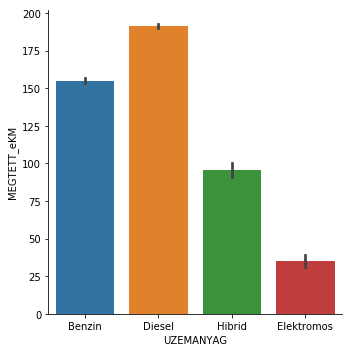

In [43]:
x["MEGTETT_eKM"] = x["MEGTETT"]/1000

fg = sns.catplot(x="UZEMANYAG", y="MEGTETT_eKM", kind="bar", data=x)
fg.savefig("Uzemanyag_KM.png.")

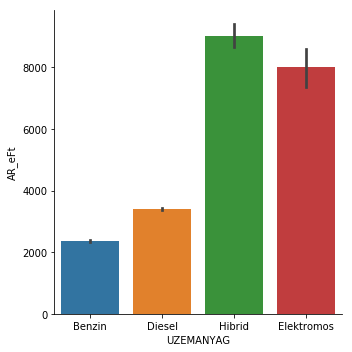

In [44]:
x["AR_eFt"] = x["AR"]/1000

fg = sns.catplot(x="UZEMANYAG", y="AR_eFt", kind="bar", data=x)
fg.savefig("Uzemanyag_AR.png.")

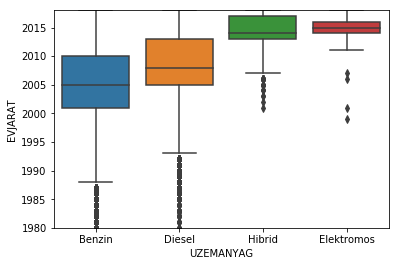

In [45]:
x["EVJARAT_2szamjegy"] = x["EVJARAT"]-1900

ax = sns.boxplot(x="UZEMANYAG", y="EVJARAT", data=x)
ax.set(ylim=(1980, 2018))
fig = ax.get_figure()
fig.savefig("ln_ar.")

In [46]:
"""
Eredeti eset: 
124 márka és 90003 megfigyelés

freq > 10
60 márka és 89815 megfigyelés

freq > 100
42 márka és 89287 megfigyelés

x.groupby('MARKA_encoded').count()


"""

"\nEredeti eset: \n124 márka és 90003 megfigyelés\n\nfreq > 10\n60 márka és 89815 megfigyelés\n\nfreq > 100\n42 márka és 89287 megfigyelés\n\nx.groupby('MARKA_encoded').count()\n\n\n"

In [47]:
"""
for r in list(reversed(range(len(x)))):
    if x['AR'].loc[r]<10000 or x['freq'].loc[r]<100:
        
        x.drop(x.index[r], inplace=True)
"""

"\nfor r in list(reversed(range(len(x)))):\n    if x['AR'].loc[r]<10000 or x['freq'].loc[r]<100:\n        \n        x.drop(x.index[r], inplace=True)\n"

In [10]:
print(len(x.groupby('MARKA_encoded').count()), len(x))
print(np.mean(x['AR']), np.median(x['AR']), np.std(x['AR']))

x = x.drop(x[(x['freq']<50)].index )
print(len(x.groupby('MARKA_encoded').count()), len(x))
print(np.mean(x['AR']), np.median(x['AR']), np.std(x['AR']))

x = x.drop(x[(x['AR']>30000000)].index )
print(len(x.groupby('MARKA_encoded').count()), len(x))
print(np.mean(x['AR']), np.median(x['AR']), np.std(x['AR']))

x = x.drop(x[(x['AR']<200000)].index )
print(len(x.groupby('MARKA_encoded').count()), len(x))a
print(np.mean(x['AR']), np.median(x['AR']), np.std(x['AR']))

marka = x['MARKA_encoded'].values.tolist()
marka = list(Counter(marka).keys())

124 90003
2997566.4392298036 1599999.0 3931783.1112064873
45 89462
2986754.2887371173 1599388.5 3907313.053042833
45 89453
2983201.512112506 1599000.0 3891176.448004368
45 87285
3053701.060044681 1679000.0 3913081.648479542


In [36]:
adatbazis = x
print(len(adatbazis))
print(adatbazis)


87285
       ALUFELNI  AMERIKAI MODELL  ASR  AUTOMATA  BI-XENON  BLUETOOTH  BLR  \
0           0.0              0.0  0.0       0.0       0.0        1.0  0.0   
1           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
2           1.0              0.0  0.0       0.0       0.0        0.0  1.0   
3           0.0              0.0  0.0       0.0       0.0        0.0  0.0   
4           1.0              0.0  0.0       0.0       0.0        0.0  0.0   
5           0.0              0.0  1.0       0.0       0.0        1.0  0.0   
6           1.0              0.0  1.0       0.0       0.0        1.0  1.0   
7           1.0              0.0  0.0       1.0       0.0        1.0  1.0   
8           0.0              0.0  0.0       1.0       0.0        0.0  0.0   
9           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
10          1.0              0.0  1.0       0.0       0.0        0.0  0.0   
11          1.0              0.0  0.0       0.0       0.0        0.0  

In [54]:
adatbazis2 = adatbazis.drop(adatbazis[(adatbazis['EVJARAT']<1990)].index )
print(len(adatbazis2))
print(adatbazis2)

86337
       ALUFELNI  AMERIKAI MODELL  ASR  AUTOMATA  BI-XENON  BLUETOOTH  BLR  \
0           0.0              0.0  0.0       0.0       0.0        1.0  0.0   
1           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
2           1.0              0.0  0.0       0.0       0.0        0.0  1.0   
3           0.0              0.0  0.0       0.0       0.0        0.0  0.0   
4           1.0              0.0  0.0       0.0       0.0        0.0  0.0   
5           0.0              0.0  1.0       0.0       0.0        1.0  0.0   
6           1.0              0.0  1.0       0.0       0.0        1.0  1.0   
7           1.0              0.0  0.0       1.0       0.0        1.0  1.0   
8           0.0              0.0  0.0       1.0       0.0        0.0  0.0   
9           1.0              0.0  0.0       0.0       0.0        1.0  0.0   
10          1.0              0.0  1.0       0.0       0.0        0.0  0.0   
11          1.0              0.0  0.0       0.0       0.0        0.0  

In [46]:
adatbazis_bmw = adatbazis2.drop(adatbazis2[(adatbazis2['MARKA']!='bmw')].index )
print(len(adatbazis_bmw))

8352


In [47]:
adatbazis_audi = adatbazis2.drop(adatbazis2[(adatbazis2['MARKA']!='audi')].index )
print(len(adatbazis_audi))

5995


In [48]:
adatbazis_mercedes = adatbazis2.drop(adatbazis2[(adatbazis2['MARKA']!='mercedes-benz')].index )
print(len(adatbazis_mercedes))

6198


In [ ]:
adatbazis_premium = 

In [56]:

adatbazis2.to_csv('Adatvezerelt_auto_1.csv',index=None)

In [25]:
for elem in x['MARKA'].unique():
    x[str(elem)] = x['MARKA'] == elem

In [26]:
for elem in x['UZEMANYAG'].unique():
    x[str(elem)] = x['UZEMANYAG'] == elem

In [51]:
varnames = list(x.columns.values)

len(varnames)

118

In [52]:
"""varnames = list(x.columns.values)
print(len(varnames))

almarka = [f.split()[1] for f in x["nev"] ]
x["almarka"] = almarka


for elem in x['almarka'].unique():
    x[str(elem)] = x['almarka'] == elem
    
x = x.drop('almarka', axis=1)


varnames = list(x.columns.values)
print(len(varnames))"""

'varnames = list(x.columns.values)\nprint(len(varnames))\n\nalmarka = [f.split()[1] for f in x["nev"] ]\nx["almarka"] = almarka\n\nfor elem in x[\'almarka\'].unique():\n    x[str(elem)] = x[\'almarka\'] == elem\n    \nx = x.drop(\'almarka\', axis=1)\n\n\nvarnames = list(x.columns.values)\nprint(len(varnames))'

In [53]:
y = x["AR"]
x = x.drop(['AR'], axis=1)
x = x.drop(['TELJESITMENY KW'], axis=1)
x = x.drop(['freq'], axis=1)
x = x.drop('MEGTETT_eKM', axis=1)
x = x.drop('AR_eFt', axis=1)
x = x.drop('EVJARAT_2szamjegy', axis=1)
x = x.drop('hajtaslanc_freq', axis=1)

x = x.drop('UZEMANYAG', axis=1)
x = x.drop('UZEMANYAG_encoded', axis=1)

x = x.drop('MARKA', axis=1)
x = x.drop('MARKA_encoded', axis=1)


nev = x["nev"]
x = x.drop(['nev'], axis=1)
link = x["link"]
x = x.drop(['link'], axis=1)

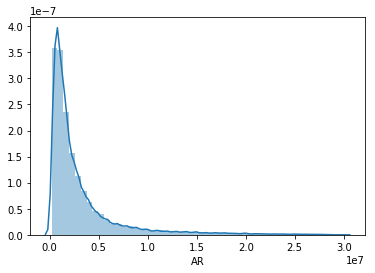

In [54]:
ax = sns.distplot(y)
fig = ax.get_figure()
fig.savefig("ar.")

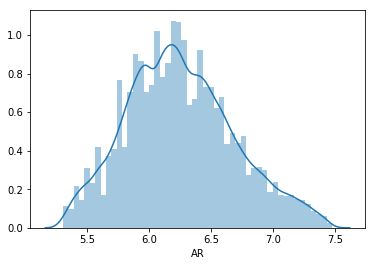

In [55]:
lg10_y = np.log10(y)
x["lg10_AR"] = lg10_y

ax = sns.distplot(lg10_y)
fig = ax.get_figure()
fig.savefig("lg10_ar.")

In [76]:
x["AR"] = lg10_y


In [57]:
#correlation matrix
"""
corr= x.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, square=True);

"""

'\ncorr= x.corr()\nf, ax = plt.subplots(figsize=(20, 20))\nsns.heatmap(corr, vmax=.8, square=True);\n\n'

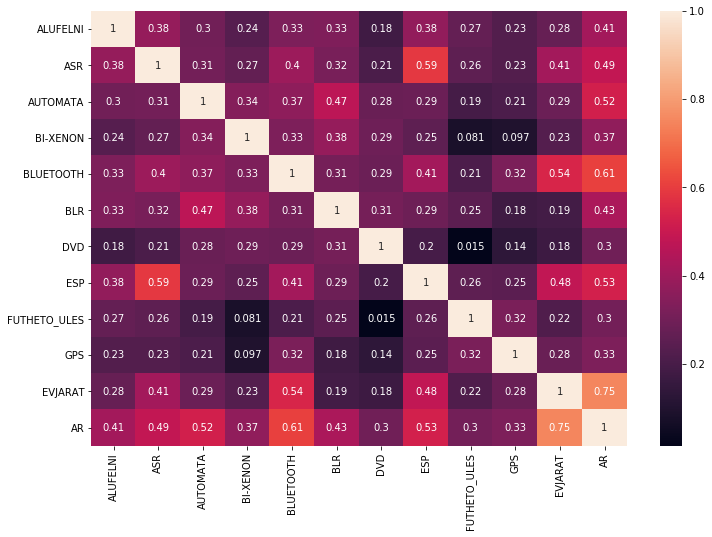

<Figure size 432x288 with 0 Axes>

In [77]:
#x = x.drop('lg10_AR', axis=1)

corr= x.corr()

top_feature = corr.index[abs(corr['AR']>0.25)]
plt.subplots(figsize=(12, 8))
top_corr = x[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
#fig = ax.get_figure()
plt.savefig("korr.")

In [59]:
top_feature = top_feature.drop("AR")
top_feature = top_feature.drop("lg10_AR")

In [60]:
dummyk = list(x.columns.values)

dummyk.remove('AR')
dummyk.remove('EVJARAT')
dummyk.remove('HENGERURTARTALOM')
dummyk.remove('TELJESITMENY LOERO')
dummyk.remove('MEGTETT')
dummyk.remove('lg10_AR')

"""

for oszlop in dummyk:
    print(oszlop, np.count_nonzero(x[oszlop]))
    
"""

'\n\nfor oszlop in dummyk:\n    print(oszlop, np.count_nonzero(x[oszlop]))\n    \n'

## Lin reg

In [61]:
10**min(lg10_y)

200000.00000000003

https://www.kaggle.com/ogrellier/kfold-or-stratifiedkfold

In [59]:
for column in dummyk:
    try: x[column]  = x[column].astype(int)
    except:
        print("fos")

    
    

#[int(x) for x in x[column] if x == 'true']

NameError: name 'dummyk' is not defined

In [63]:
np.asarray(x)
x.head()

,ALUFELNI,AMERIKAI MODELL,ASR,AUTOMATA,BI-XENON,BLUETOOTH,BLR,CD-RADIO,CENTRALZAR,DVD,...,dodge,jeep,porsche,infiniti,Benzin,Diesel,Hibrid,Elektromos,lg10_AR,AR
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,6.476976,6.476976
1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,5.928908,5.928908
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,6.094270,6.094270
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,6.045757,6.045757
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,6.622214,6.622214


In [64]:
x["AR"] = 10**x["lg10_AR"]
x = x.drop(['AR'], axis=1)
x = x.drop(['lg10_AR'], axis=1)

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x[top_feature], y/1000, test_size=0.2, random_state=42)


In [78]:
import statsmodels.api as sm # import statsmodels

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     AR   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     2753.
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:05:47   Log-Likelihood:                 15572.
No. Observations:               69828   AIC:                        -3.094e+04
Df Residuals:                   69724   BIC:                        -2.998e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ALUF

In [80]:
!pip install pill

  Could not find a version that satisfies the requirement pill (from versions: )
No matching distribution found for pill
You are using pip version 10.0.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


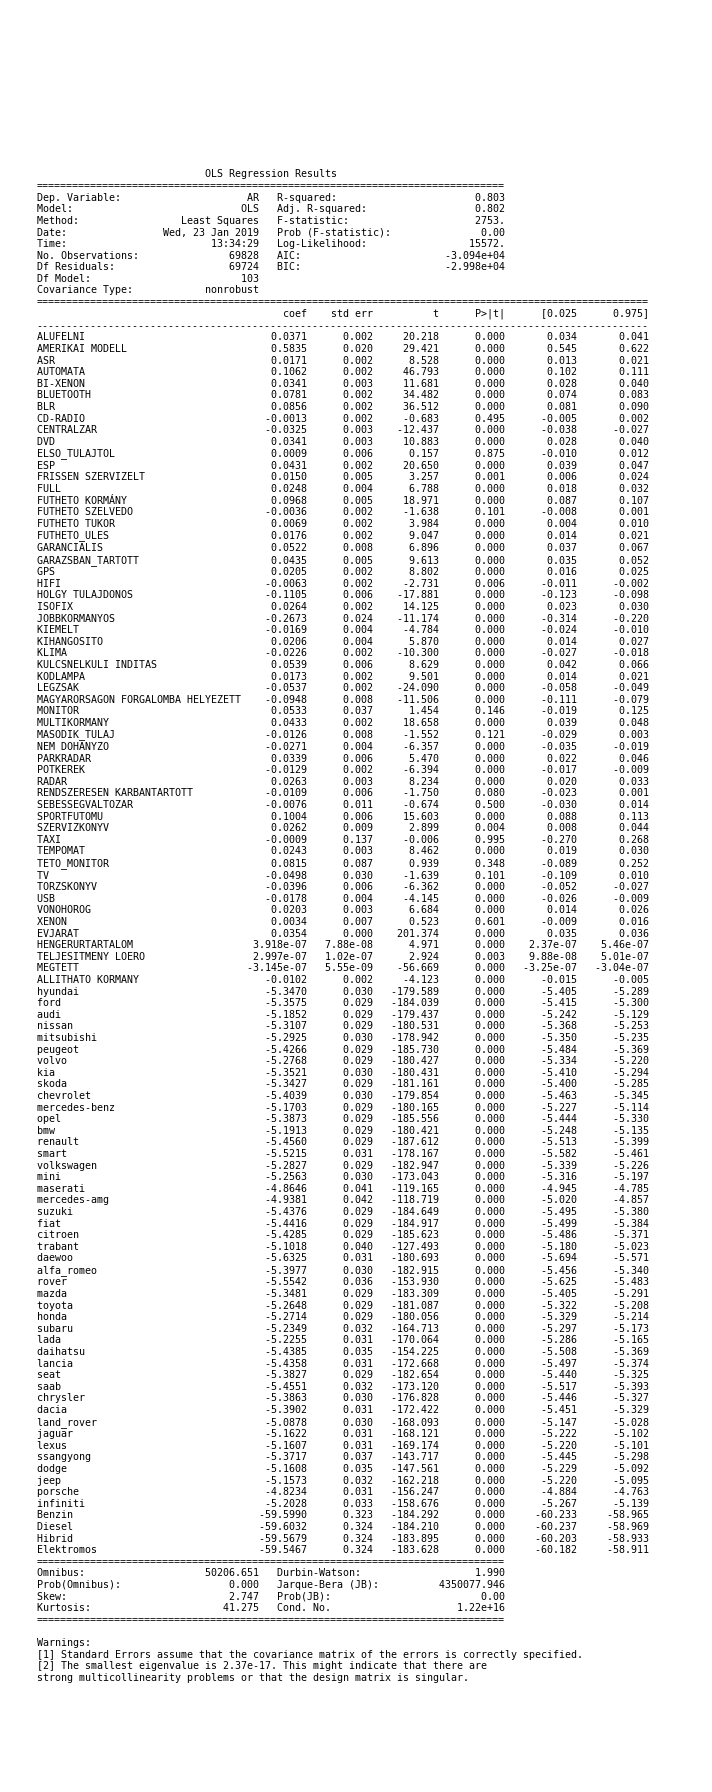

In [103]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 25))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, lg10_y, test_size=0.2, random_state=42)


In [68]:
x.shape
#lg10_y.shape

(87285, 105)

In [69]:
#x["lg10_y"] = lg10_y
#x["lg10_y"].values

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

In [70]:
"""#x_train, x_test, y_train, y_test = train_test_split(x, ln_y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

lreg = LinearRegression()


# 5 folds cross validation
skf =  StratifiedKFold(n_splits=5, shuffle=True, random_state =42)
kf = KFold(n_splits=5, random_state =42)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)


X2 = x.iloc[:,:-1].values
Y2 = x["lg10_y"].values

mae = []
rmses =[]

for train_index, test_index in kf.split(X2,Y2):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # fitting and predicting
    lreg.fit(x_train, y_train)
    y_test_pred = lreg.predict(x_test)
    
    # list of mse-s
    rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    mae.append(mean_absolute_error(y_test, y_test_pred))
     
print('Mean of rMSE for linreg: ', np.mean(mses))
print('Standard deviation of MSE for linreg: ', np.std(mses, ddof=1))   

"""

'#x_train, x_test, y_train, y_test = train_test_split(x, ln_y, test_size=0.2, random_state=42)\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_absolute_error\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import RepeatedStratifiedKFold\n\nlreg = LinearRegression()\n\n\n# 5 folds cross validation\nskf =  StratifiedKFold(n_splits=5, shuffle=True, random_state =42)\nkf = KFold(n_splits=5, random_state =42)\nrskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)\n\n\nX2 = x.iloc[:,:-1].values\nY2 = x["lg10_y"].values\n\nmae = []\nrmses =[]\n\nfor train_index, test_index in kf.split(X2,Y2):\n    x_train, x_test = x[train_index], x[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    \n\n    # fitting and predicting\n    lreg.fit(x_train, y_train)\n    y_test_pred = lreg.predict(x_test)\n    \n  

In [83]:
lreg = LinearRegression()

lreg.fit(x_train, y_train)

#y_train_pred = lreg.predict(x_train)

y_test_pred = lreg.predict(x_test)

lin_mse = mean_squared_error(y_test, y_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

mean_absolute_error(y_test, y_test_pred)

0.12811576889666607

In [94]:
log_hiba = y_test- y_test_pred 
szazalekos_log_hiba = log_hiba/y_test
#np.mean(10**szazalekos_log_hiba)
print("Logaritmikus")
print("RMSE:",np.sqrt(sum(szazalekos_log_hiba**2)/len(szazalekos_log_hiba)))
print("MAE:", np.mean(abs(szazalekos_log_hiba)))



Logaritmikus
RMSE: 0.030117287130455365
MAE: 0.020690862175367815


In [95]:
y_test_pred_10 = 10**y_test_pred
y_test_10 = 10**y_test

In [98]:
hiba = y_test_10 -y_test_pred_10
szazalekos_hiba = hiba/y_test_10
print("Lineáris")
print("RMSE:",np.sqrt(sum(szazalekos_hiba**2)/len(szazalekos_hiba)))
print("MAE:", np.mean(abs(szazalekos_hiba)))



Lineáris
RMSE: 0.4709979557580643
MAE: 0.30882541802693503
RMSE: 0.4709979557580643


https://matplotlib.org/gallery/pyplots/pyplot_scales.html

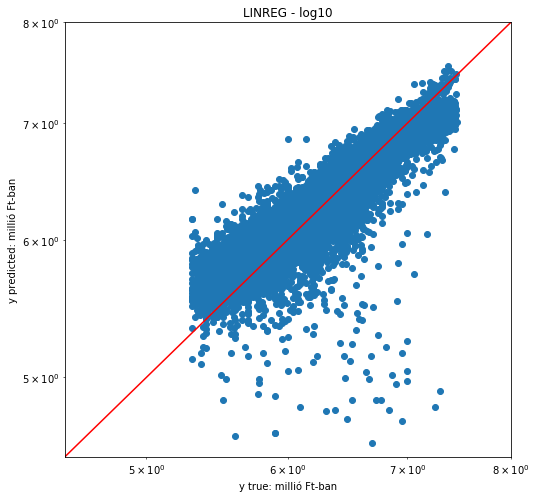

In [104]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred)
plt.title('LINREG - log10')
plt.xlabel('y true: millió Ft-ban')
plt.xlim(4.5,8)
plt.ylim(4.5,8)
plt.ylabel('y predicted: millió Ft-ban')
plt.plot([4.5,8],[4.5,8], color='red' )
plt.yscale("log")
plt.xscale("log")
plt.savefig("LINREG - log10")

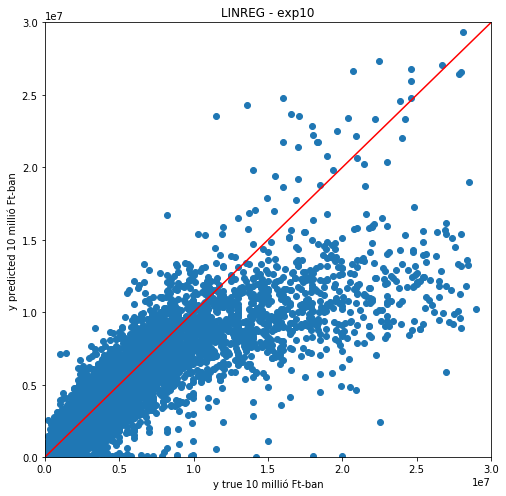

In [131]:
plt.figure(figsize=(8,8))
plt.scatter(y_test_10, y_test_pred_10)
plt.title('LINREG - exp10')
plt.xlabel('y true 10 millió Ft-ban')
plt.xlim(0,30000000)
plt.ylim(0,30000000)
plt.ylabel('y predicted 10 millió Ft-ban')
plt.plot([0,30000000],[0,30000000], color='red' )
plt.yscale("linear")
plt.xscale("linear")
plt.savefig("LINREG - exp10")

### XGBOOST

https://www.kaggle.com/dansbecker/xgboost

In [107]:
from sklearn.preprocessing import Imputer

In [108]:
#y_test = np.log(y_test)
#y_train = np.log(y_train)

In [109]:
for db in y_test:
    if np.isnan(db) == True:
        print(db)
    

In [110]:
my_imputer = Imputer()
train_X = my_imputer.fit_transform(x_train)
test_X = my_imputer.transform(x_test)

In [111]:
from xgboost import XGBRegressor

"""

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, y_train, verbose=False)

# make predictions
predictions = my_model.predict(test_X)

XGBR_mse = mean_squared_error(y_test, predictions)
XGBR_rmse = np.sqrt(XGBR_mse)
XGBR_rmse

"""

'\n\nmy_model = XGBRegressor()\n# Add silent=True to avoid printing out updates with each cycle\nmy_model.fit(train_X, y_train, verbose=False)\n\n# make predictions\npredictions = my_model.predict(test_X)\n\nXGBR_mse = mean_squared_error(y_test, predictions)\nXGBR_rmse = np.sqrt(XGBR_mse)\nXGBR_rmse\n\n'

In [121]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

my_model.fit(train_X, y_train)

# make predictions
predictions = my_model.predict(test_X)

XGBR_mse = mean_squared_error(y_test, predictions)
XGBR_rmse = np.sqrt(XGBR_mse)


0.08319162220545305

In [124]:
XGBR_rmse


0.1165844271358192

In [123]:

mean_absolute_error(y_test, predictions)

0.08319162220545305

In [113]:
y_test_10 = 10**y_test
predictions_10 = 10**predictions

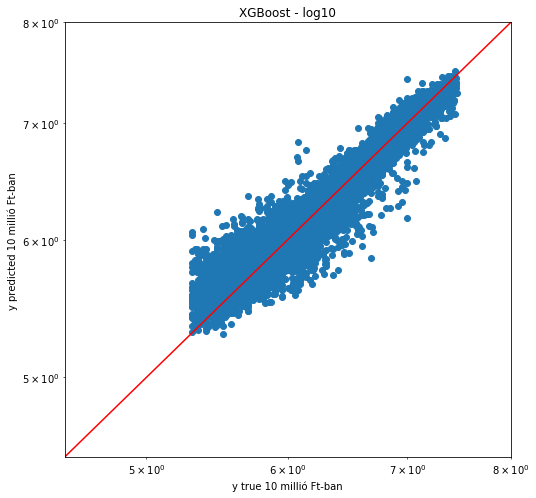

In [128]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions)
plt.title('XGBoost - log10')
plt.xlabel('y true millió Ft-ban')
plt.xlim(4.5,8)
plt.ylim(4.5,8)
plt.ylabel('y predicted millió Ft-ban')
plt.plot([4.5,8],[4.5,8], color='red' )
plt.yscale("log")
plt.xscale("log")
plt.savefig("XGBoost - log10")


In [115]:
log_hiba = y_test- predictions 
szazalekos_log_hiba = log_hiba/y_test
#np.mean(10**szazalekos_log_hiba)
print("Logaritmikus")
print("RMSE:",np.sqrt(sum(szazalekos_log_hiba**2)/len(szazalekos_log_hiba)))
print("MAE:", np.mean(abs(szazalekos_log_hiba)))

Logaritmikus
RMSE: 0.01934097922754744
MAE: 0.013554649942663932


In [116]:
hiba = predictions_10 - y_test_10
szazalekos_hiba = hiba/y_test_10
print("Lineáris")
print("RMSE:",np.sqrt(sum(szazalekos_hiba**2)/len(szazalekos_hiba)))
print("MAE:", np.mean(abs(szazalekos_hiba)))

Lineáris
RMSE: 0.3232617397351657
MAE: 0.2024009089240442


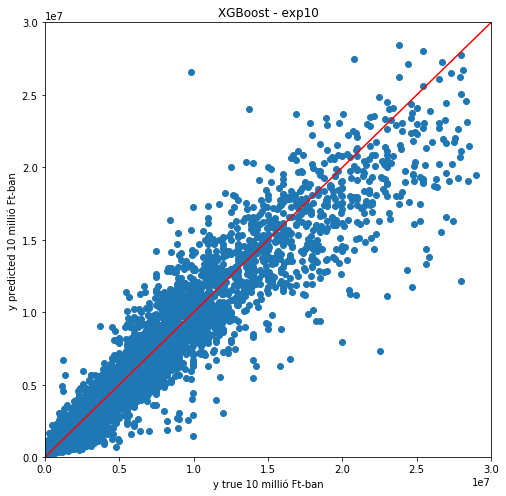

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(y_test_10, predictions_10)
plt.title('XGBoost - exp10')
plt.xlabel('y true 10 millió Ft-ban')
plt.xlim(0,30000000)
plt.ylim(0,30000000)
plt.ylabel('y predicted 10 millió Ft-ban')
plt.plot([0,30000000],[0,30000000], color='red' )
plt.yscale("linear")
plt.xscale("linear")
plt.savefig("XGBoost - exp10")

In [118]:
from matplotlib import pyplot

[8.8010384e-03 3.4627039e-03 2.4527486e-03 1.1686625e-02 1.4427933e-03
 2.8855866e-03 9.6667148e-03 4.3283799e-03 2.1641899e-03 4.1841003e-03
 1.7313519e-03 6.4925696e-03 7.7910833e-03 2.1641899e-03 1.7313519e-03
 1.4427933e-03 3.7512626e-03 7.0696869e-03 1.1542346e-03 6.6368491e-03
 2.0199106e-03 3.4627039e-03 1.5870726e-03 2.8855866e-03 6.6368491e-03
 7.2139665e-04 3.7512626e-03 8.3682006e-03 1.4427933e-04 6.0597318e-03
 2.4527486e-03 7.2139665e-04 5.7711732e-04 3.7512626e-03 4.4726590e-03
 2.5970279e-03 1.8756313e-03 4.7612176e-03 2.1641899e-03 3.0298659e-03
 0.0000000e+00 4.4726590e-03 5.0497763e-03 0.0000000e+00 1.5870726e-03
 0.0000000e+00 0.0000000e+00 2.3084693e-03 2.8855866e-03 7.6468042e-03
 7.2139665e-04 1.8092628e-01 1.5134901e-01 1.5062761e-01 9.3493000e-02
 6.2040109e-03 2.5970279e-03 7.0696869e-03 1.0676670e-02 3.6069832e-03
 3.4627039e-03 6.6368491e-03 3.8955417e-03 2.8855866e-03 1.0099553e-03
 6.6368491e-03 1.1398067e-02 6.3482905e-03 1.0965229e-02 8.6567597e-03
 2.885

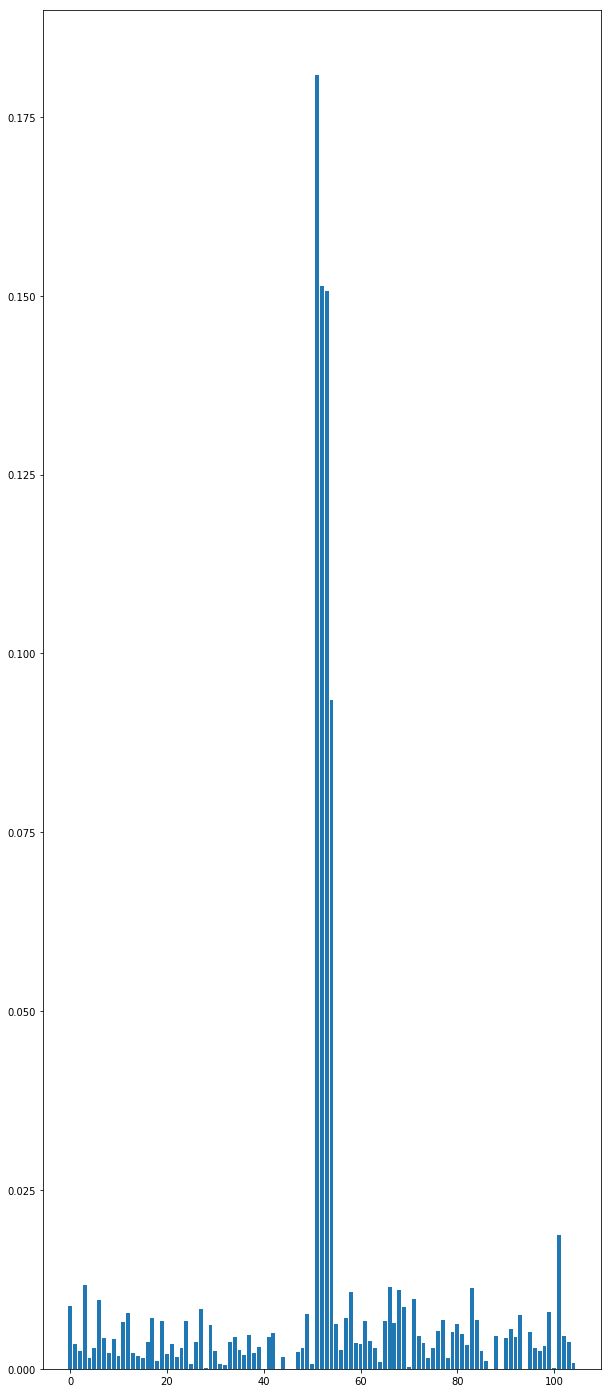

<Figure size 720x1800 with 0 Axes>

In [119]:
# feature importance
print(my_model.feature_importances_)
# plot
pyplot.bar(range(len(my_model.feature_importances_)), my_model.feature_importances_)
pyplot.show()
pyplot.savefig("my_model.png")

EVJARAT
HENGERURTARTALOM
TELJESITMENY LOERO
MEGTETT
Benzin
AUTOMATA
mercedes-benz


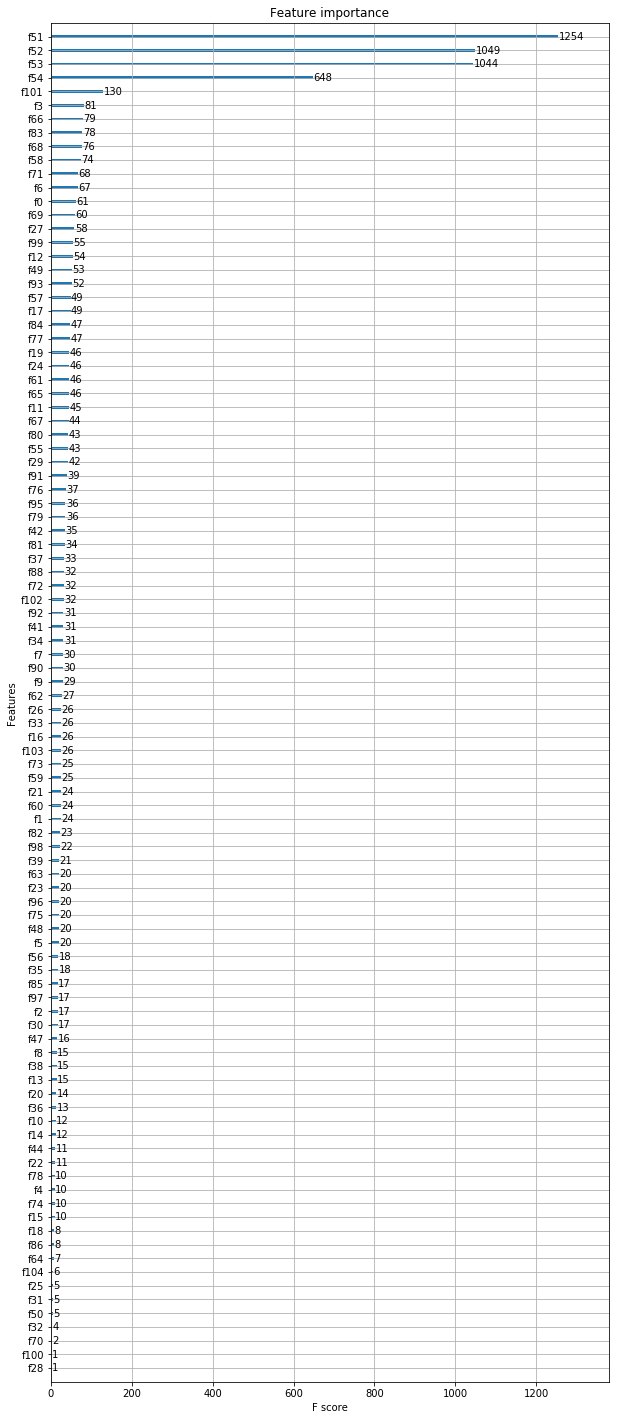

In [120]:
"""
# plot feature importance
from xgboost import plot_importance
plot_importance(my_model)
pyplot.show()

"""
from xgboost import plot_importance

features = list(x_train.columns.values)

for i in [51,52,53,54,101,3,66]:
    print(features[i])
fig, ax = plt.subplots(figsize=(10, 25))
plot_importance(my_model, ax=ax)
fig.savefig("plot_importance.png")

## Valassz ki predikcios hiba alapjan legjobb es legkevesbe jo vetelt.

In [142]:
#x = x.drop('hiba', axis=1)
#x = x.drop('link', axis=1)
x = x.drop('AR', axis=1)

In [143]:
X = x
X = my_imputer.fit_transform(X)
X = my_imputer.transform(X)

In [144]:
elorejelzes = my_model.predict(X)


In [145]:
"""LOGARITMIZÁLT"""

log_hiba_X = lg10_y - elorejelzes 
szazalekos_log_hiba = log_hiba_X/lg10_y


In [146]:
"""LINEÁRIS"""

hiba_X = y - 10**elorejelzes
szazalekos_hiba = hiba_X/10**elorejelzes
x["link"] = link
x["nev"] = nev

In [149]:
elorejelzes_10 = 10**elorejelzes


In [150]:
legjobb = max(szazalekos_hiba)
itemindex_best = np.where(szazalekos_hiba==legjobb)
itemindex_best

(array([85878]),)

In [151]:
print(link[85878])
print(elorejelzes_10[85878], y[85878],)
x["nev"][85878]

https://www.hasznaltauto.hu/szemelyauto/chevrolet/kalos/chevrolet_kalos_1_2_8v_direct_gyujtoi_darab-13603926
657951.56 18900000


'CHEVROLET KALOS 1.2 8V Direct GYĹ°JTĹ\x90I DARAB'

In [152]:
legrosszabb = min(szazalekos_hiba)
itemindex_worst = np.where(szazalekos_hiba==legrosszabb)  
itemindex_worst

(array([7006]),)

In [153]:
print(link[7006])
print(elorejelzes_10[7006], y[7006],)
x["nev"][7006]

https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/300/mercedes-benz_300_d-13599076
2729165.8 305000


'MERCEDES-BENZ 300 D'

In [154]:
x["nev"][7006].split()[1]

'300'

In [ ]:
leginkább_alul = nagy.ix[nagy.loc[nagy['log_hiba'] == min(nagy["log_hiba"])].index,-1]

In [ ]:
leginkább_felül = nagy.ix[nagy.loc[nagy['log_hiba'] == max(nagy["log_hiba"])].index,-1]

In [ ]:
print(leginkább_alul,leginkább_felül)

#print(link[88538],nev[88538])
nev[9188]
len(nev)
len(nagy)

In [ ]:
predikciok = pd.DataFrame(link)

predictions = pd.DataFrame(predictions)

log_pred = predictions
log_y_test = pd.DataFrame(y_test)

pred_10 = pd.DataFrame(10**predictions)
y_test= pd.DataFrame(10**y_test)


In [ ]:
log_hiba = log_y_test.values-log_pred.values

hiba = y_test.values-pred_10.values

#print(10**min(log_hiba)== min(hiba),min(hiba))
log_hiba

In [ ]:
predikciok["test"] = np.exp(y_test.values)
predikciok["link"] = predikciok["link"].values

predikciok["hiba"] = predikciok["pred"]-predikciok["test"]
 

legjobb = min(predikciok["hiba"])
legrosszabb = max(predikciok["hiba"])



In [ ]:
link_eredeti = predikciok["link"] 

In [ ]:
link = [str(f) for f in link]
len(link)

In [ ]:
predikciok["link"].loc[6020]

In [ ]:
#predikciok.loc[predikciok['hiba'].isin(legrosszabb)]


predikciok.loc[predikciok['hiba'] == legrosszabb]

In [ ]:
link[0]

In [ ]:
print(legjobb, legrosszabb)

In [ ]:
plt.scatter(y_train, y_train_pred, s=5)
plt.title('Training set')
plt.xlabel('y true')
plt.ylabel('y predicted')

plt.scatter(y_test, predictions)
plt.title('XGBOOST: Test set (orange) and trainig set (blue)')
plt.xlabel('y true')
plt.ylabel('y predicted')

## PCA 


https://umap-learn.readthedocs.io/en/latest/faq.html#what-is-the-difference-between-umap-vaes-pca

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

UMAP: 
    
https://github.com/mrpep/Digital-Audio-Signal-Processing-and-Machine-Learning-Tutorials/blob/master/Audio%20exploration.ipynb?fbclid=IwAR0s8fs7tzKCyJkpochJwtl6L13ggBQMMTmhq71Mt29vW2RY880m7sTXpRg

In [ ]:
features = dummyk

In [ ]:
scaler = StandardScaler()
x[features] = scaler.fit_transform(x[features])

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x[features])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
PCA_table = pd.concat([principalDf, x['UZEMANYAG_encoded']], axis = 1)
PCA_table.head()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
print(digits.target)

In [ ]:
pd.value_counts(x['UZEMANYAG_encoded'].values, sort=False)


In [ ]:
plt.scatter(PCA_table["principal component 1"], PCA_table["principal component 2"],
            c=PCA_table["UZEMANYAG_encoded"], edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();



In [ ]:
x = x[["UZEMANYAG_encoded","EVJARAT","TELJESITMENY LOERO","MEGTETT","MARKA_encoded"]]

In [ ]:
x["PCA_1"] = PCA_table["principal component 1"]
x["PCA_2"] = PCA_table["principal component 2"]

In [ ]:
!pip install umap-learn